## Single/Double slit diffraction using the Fresnel integrals

This code makes a plot of the intensity pattern in the near-field downstream of a single or double slit.
It uses the Fresnel integrals, see
<a href = "https://global.oup.com/academic/product/optics-f2f-9780198786795?cc=gb&lang=en&">Optics f2f</a> Sec. 5.10.

The code allows us to vary both the width of each slit $a$ and the spacing between them $d$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import matplotlib.colors as colors
from numpy.fft import fft, ifft, fftshift

import matplotlib.colors as colors
import matplotlib.patches as mpatches

import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams["text.latex.preamble"]  = r"\usepackage{amsmath} \usepackage{amssymb} \usepackage[bitstream-charter]{mathdesign}"
mpl.rcParams["text.usetex"] = True

First we define a function to perform the fresnel integrals for a **double slit**.

In [2]:
from scipy.special import fresnel

def fresnel_integrals(soff1):
    c1=fresnel(sa/2-soff1-sx)[0]
    c2=fresnel(-sa/2-soff1-sx)[0]
    s1=fresnel(sa/2-soff1-sx)[1]
    s2=fresnel(-sa/2-soff1-sx)[1]
    c3=fresnel(sa/2+soff1-sx)[0]
    c4=fresnel(-sa/2+soff1-sx)[0]
    s3=fresnel(sa/2+soff1-sx)[1]
    s4=fresnel(-sa/2+soff1-sx)[1] 
    return c1-c2+c3-c4, s1-s2+s3-s4

This cell sets up a grid, and fills an intensity map in the array H. For the double slit we have
chosen $d/a = 5$, but we can change this. Note that all distances are scaled in units of the Fresnel length.
The Frensel integrals are in general much faster than a Fourier code but have more limitations in terms
of what type of apertures we can model.

In [3]:
start_time = time.time()

xmax=50.0 
dx=0.1 
x = np.arange(-xmax,xmax,dx)

num=1000 # number of steps in z direction
dim = np.size(x)
H = np.zeros((num,dim))

a = 6.0
d = 30.0
off1 = d/2 # spacing between slits

for ii in range (0,num):
    z=1.0*ii+0.0001
    sa=a/np.sqrt(z/np.pi)
    sx=x/np.sqrt(z/np.pi)
    soff1=off1/np.sqrt(z/np.pi)
    c_tot, s_tot = fresnel_integrals(soff1)    
    intensity=0.5*(c_tot*c_tot+s_tot*s_tot)
    H[ii,:]+=intensity**0.5
    
R = np.zeros((num,dim))
G = np.zeros((num,dim))
B = np.zeros((num,dim))
G += H
B += H
br=1.0
bg=1.0 
bb=1.0 
R=np.clip(br*R,0.0,1.0)
G=np.clip(bg*G,0.0,1.0)
B=np.clip(bb*B,0.0,1.0)
RGB = np.dstack((np.flipud(R.T), np.flipud(G.T), np.flipud(B.T))) # use transpose to swap image axes, flipud to origin at bottom left
RGB_double = RGB # use transpose to swap image axes, flipud to origin at bottom left
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.42598557472229004 seconds ---


--- 0.06177186965942383 seconds ---


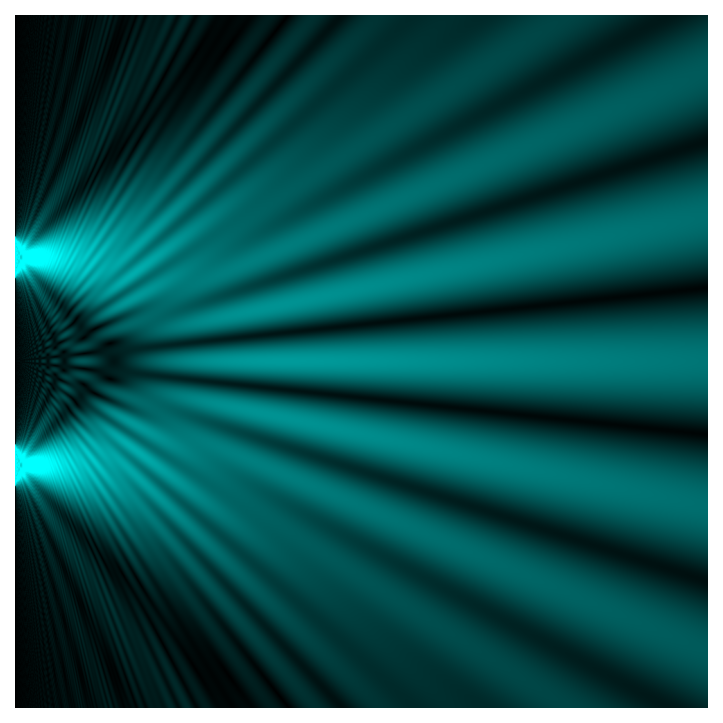

In [4]:
start_time = time.time()
fig, ax = plt.subplots(1,1,figsize=(6, 6),dpi=150)

ax.imshow(RGB)
ax.set_axis_off()
print("--- %s seconds ---" % (time.time() - start_time))

Now do the same for a **single slit**.

In [5]:
def fresnel_single_slit(jj):
    c1=fresnel(sa/2-sx)[0]
    c2=fresnel(-sa/2-sx)[0]
    s1=fresnel(sa/2-sx)[1]
    s2=fresnel(-sa/2-sx)[1]
    return c1-c2, s1-s2

xmax=10.0 
dx=0.02 
x = np.arange(-xmax,xmax,dx)

num=1000 # number of steps in z direction
dim = np.size(x)
H = np.zeros((num,dim))

for ii in range (0,num):
    z=0.05*ii+0.0001
    sa=a/np.sqrt(z/np.pi)
    sx=x/np.sqrt(z/np.pi)
    c_tot, s_tot = fresnel_single_slit(0)    
    intensity=0.5*(c_tot*c_tot+s_tot*s_tot)
    H[ii,:]+=intensity**0.5
    
R = np.zeros((num,dim))
G = np.zeros((num,dim))
B = np.zeros((num,dim))

G += H
B += H

br=0.75
bg=0.75 
bb=0.75 
R=np.clip(br*R,0.0,1.0)
G=np.clip(bg*G,0.0,1.0)
B=np.clip(bb*B,0.0,1.0)
RGB=np.dstack((np.flipud(R.T), np.flipud(G.T), np.flipud(B.T))) # use transpose to swap image axes, flipud to origin at bottom left

The next cell adds some arrows and labels to the plot. There is no new physics here! We could hide this in a function, see for example the
Letters or Array notebook in Chapter 6. This would avoid repeat great chunk of code but for only two plots it is not too bad.

--- 0.11856675148010254 seconds ---


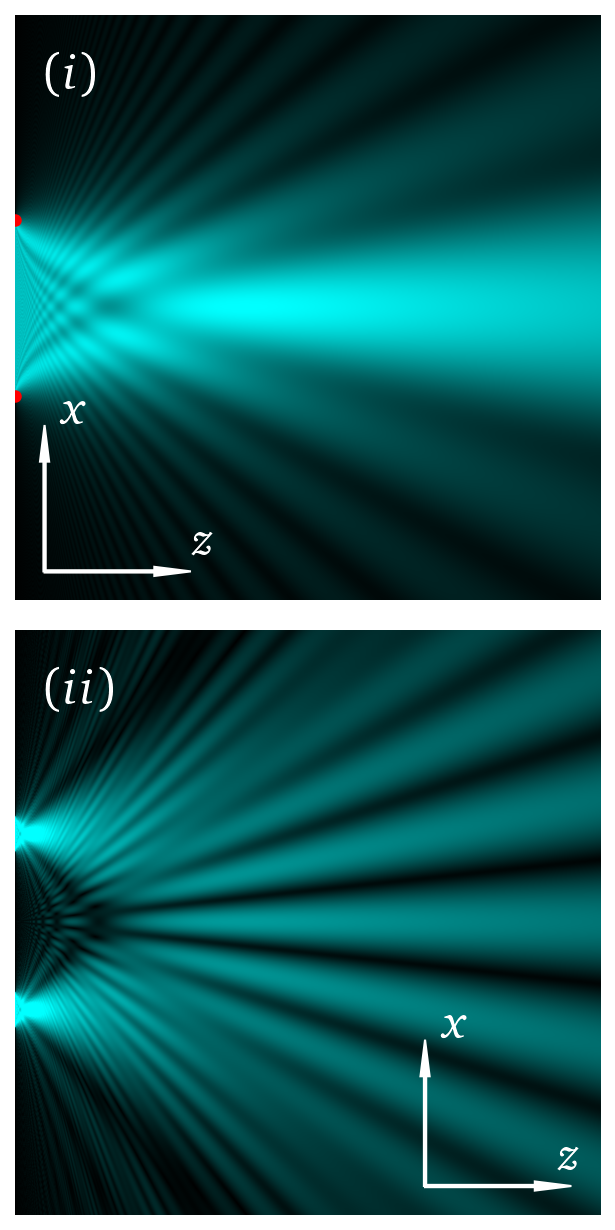

In [6]:
start_time = time.time()

zoom_x_pts, zoom_y_pts, channels  = np.shape(RGB)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(4, 8),dpi=150)

ax1.imshow(RGB)
arrow = mpatches.FancyArrow(1*zoom_x_pts/20, 19*zoom_x_pts/20,  zoom_x_pts/4, 0, width=zoom_x_pts/256, head_width = zoom_x_pts/64, 
                        head_length = zoom_x_pts/16, length_includes_head=True, color = 'white')
ax1.add_patch(arrow)
arrow = mpatches.FancyArrow(1*zoom_x_pts/20, 19*zoom_x_pts/20,  0, -zoom_x_pts/4, width=zoom_x_pts/256, head_width = zoom_x_pts/64, 
                        head_length = zoom_x_pts/16, length_includes_head=True, color = 'white')
ax1.add_patch(arrow)
fs =24

ax1.text(zoom_x_pts/20,zoom_x_pts/8,'$(i)$',fontsize = fs, color='white')
ax1.text(3*zoom_x_pts/10, 18.5*zoom_x_pts/20,'$z$',fontsize = fs, color='white')
ax1.text(1.5*zoom_x_pts/20, 7*zoom_x_pts/10,'$x$',fontsize = fs, color='white')
ax1.set_axis_off()


ax1.scatter(0,zoom_x_pts/2-(a/2)/dx,color='red',s=[25])
ax1.scatter(0,zoom_x_pts/2+(a/2)/dx,color='red',s=[25])

ax2.imshow(RGB_double)
arrow = mpatches.FancyArrow(14*zoom_x_pts/20, 19*zoom_x_pts/20,  zoom_x_pts/4, 0, width=zoom_x_pts/256, head_width = zoom_x_pts/64, 
                        head_length = zoom_x_pts/16, length_includes_head=True, color = 'white')
ax2.add_patch(arrow)
arrow = mpatches.FancyArrow(14*zoom_x_pts/20, 19*zoom_x_pts/20,  0, -zoom_x_pts/4, width=zoom_x_pts/256, head_width = zoom_x_pts/64, 
                        head_length = zoom_x_pts/16, length_includes_head=True, color = 'white')
ax2.add_patch(arrow)

ax2.text(zoom_x_pts/20,zoom_x_pts/8,'$(ii)$',fontsize = fs, color='white')
ax2.text(18.5*zoom_x_pts/20, 18.5*zoom_x_pts/20,'$z$',fontsize = fs, color='white')
ax2.text(14.5*zoom_x_pts/20, 7*zoom_x_pts/10,'$x$',fontsize = fs, color='white')
ax2.set_axis_off()


plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.0,wspace=0.05,hspace=0.05)

print("--- %s seconds ---" % (time.time() - start_time))

In [7]:
fig.savefig('Fresnel12.png',bbox_inches='tight')

Or if you prefer landscape.

--- 0.10198545455932617 seconds ---


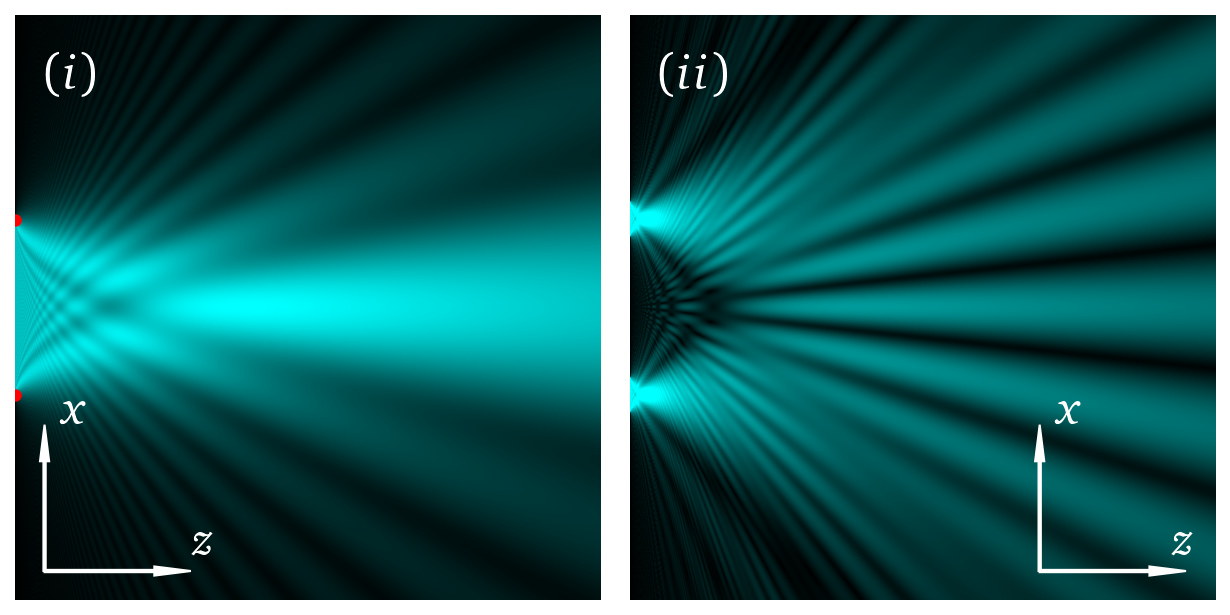

In [8]:
start_time = time.time()

zoom_x_pts, zoom_y_pts, channels  = np.shape(RGB)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8, 4),dpi=150)

ax1.imshow(RGB)
arrow = mpatches.FancyArrow(1*zoom_x_pts/20, 19*zoom_x_pts/20,  zoom_x_pts/4, 0, width=zoom_x_pts/256, head_width = zoom_x_pts/64, 
                        head_length = zoom_x_pts/16, length_includes_head=True, color = 'white')
ax1.add_patch(arrow)
arrow = mpatches.FancyArrow(1*zoom_x_pts/20, 19*zoom_x_pts/20,  0, -zoom_x_pts/4, width=zoom_x_pts/256, head_width = zoom_x_pts/64, 
                        head_length = zoom_x_pts/16, length_includes_head=True, color = 'white')
ax1.add_patch(arrow)
fs =24

ax1.text(zoom_x_pts/20,zoom_x_pts/8,'$(i)$',fontsize = fs, color='white')
ax1.text(3*zoom_x_pts/10, 18.5*zoom_x_pts/20,'$z$',fontsize = fs, color='white')
ax1.text(1.5*zoom_x_pts/20, 7*zoom_x_pts/10,'$x$',fontsize = fs, color='white')
ax1.set_axis_off()


ax1.scatter(0,zoom_x_pts/2-(a/2)/dx,color='red',s=[25])
ax1.scatter(0,zoom_x_pts/2+(a/2)/dx,color='red',s=[25])

ax2.imshow(RGB_double)
arrow = mpatches.FancyArrow(14*zoom_x_pts/20, 19*zoom_x_pts/20,  zoom_x_pts/4, 0, width=zoom_x_pts/256, head_width = zoom_x_pts/64, 
                        head_length = zoom_x_pts/16, length_includes_head=True, color = 'white')
ax2.add_patch(arrow)
arrow = mpatches.FancyArrow(14*zoom_x_pts/20, 19*zoom_x_pts/20,  0, -zoom_x_pts/4, width=zoom_x_pts/256, head_width = zoom_x_pts/64, 
                        head_length = zoom_x_pts/16, length_includes_head=True, color = 'white')
ax2.add_patch(arrow)

ax2.text(zoom_x_pts/20,zoom_x_pts/8,'$(ii)$',fontsize = fs, color='white')
ax2.text(18.5*zoom_x_pts/20, 18.5*zoom_x_pts/20,'$z$',fontsize = fs, color='white')
ax2.text(14.5*zoom_x_pts/20, 7*zoom_x_pts/10,'$x$',fontsize = fs, color='white')
ax2.set_axis_off()


plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.0,wspace=0.05,hspace=0.05)

print("--- %s seconds ---" % (time.time() - start_time))

In [9]:
fig.savefig('Fresnel12.png',bbox_inches='tight')